In [1]:
# !pip install -e /files/shared/ap/jupyter-notebook/pkgs/objFuncs --break-system-packages
# !pip install -e /files/shared/ap/jupyter-notebook/pkgs/pyBO --break-system-packages

In [2]:
# !pip install -e /files/shared/ap/jupyter-notebook/pkgs/objFuncs
# !pip install -e /files/shared/ap/jupyter-notebook/pkgs/pyBO

In [3]:
# !pip install -e ../../objFuncs
# !pip install -e ../../pyBO

In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
import objFuncs
from objFuncs import VM
from objFuncs import residuals
from objFuncs.util import plot_obj_history

objFuncs version: 1.1.0. updated on 2023-12-04


In [6]:
def test_fun0(x):
    y = np.ones(3)
    y[:2] = x - 0.2
    y[2] = np.mean(x) - 0.2
    return y

def test_fun1(x):
    y = np.ones(3)
    y[:2] = 2*x - 0.2
    y[2] = 2*np.mean(x)-0.2
    return y

def test_fun2(x):
    y = np.ones(3)
    y[:2] = 3*x - 0.2
    y[2] = 3*np.mean(x)-0.2
    return y

In [7]:
vm0 = VM(
        x0 = np.zeros(2),
        fun = test_fun0,
        decision_CSETs=['FE_LEBT:PSC2_D0948:I_CSET', 'FE_LEBT:PSC1_D0948:I_CSET',
                        ],
        objective_RDs = [ 
            'FE_MEBT:BPM_D1056:XPOS_RD',
            'FE_MEBT:BPM_D1056:YPOS_RD',
            'FE_MEBT:BPM_D1056:PHASE_RD'],
        )

In [8]:
vm1 = VM(
        x0 = np.zeros(2),
        fun = test_fun1,
        decision_CSETs=['FE_LEBT:PSC2_D0948:I_CSET', 'FE_LEBT:PSC1_D0948:I_CSET',
                        ],
        objective_RDs = [ 
            'FE_MEBT:BPM_D1056:XPOS_RD',
            'FE_MEBT:BPM_D1056:YPOS_RD',
            'FE_MEBT:BPM_D1056:PHASE_RD'],
        )

In [9]:
vm2 = VM(
        x0 = np.zeros(2),
        fun = test_fun2,
        decision_CSETs=['FE_LEBT:PSC2_D0948:I_CSET', 'FE_LEBT:PSC1_D0948:I_CSET',
                        ],
        objective_RDs = [ 
            'FE_MEBT:BPM_D1056:XPOS_RD',
            'FE_MEBT:BPM_D1056:YPOS_RD',
            'FE_MEBT:BPM_D1056:PHASE_RD'],
        )

In [10]:
objFuncs._global_machineIO.fetch_data = vm0.fetch_data
objFuncs._global_machineIO.ensure_set = vm0.ensure_set
objFuncs._global_machineIO._test = True

In [11]:
res = residuals.residualObjMultiConditionalVar(  
    decision_CSETs=['FE_LEBT:PSC2_D0948:I_CSET', 'FE_LEBT:PSC1_D0948:I_CSET',
                   ],
    decision_min= [-3,-3, ],
    decision_max= [ 3, 3, ],
    objective_goal = { 
            'FE_MEBT:BPM_D1056:XPOS_RD' : 0.0,     #(mm)
            'FE_MEBT:BPM_D1056:YPOS_RD' : 0.0, 
            'FE_MEBT:BPM_D1056:PHASE_RD': 0.0, 
            },
    objective_norm = { 
            'FE_MEBT:BPM_D1056:XPOS_RD' : 1.,     
            'FE_MEBT:BPM_D1056:YPOS_RD' : 1.,     
            'FE_MEBT:BPM_D1056:PHASE_RD': 1., 
            },
#     objective_weight = { 
#             'FE_MEBT:BPM_D1056:XPOS_RD' : 2.,     
#             'FE_MEBT:BPM_D1056:YPOS_RD' : 2.,     
#             'FE_MEBT:BPM_D1056:PHASE_RD': 1., 
#             },
    conditional_SETs = {
                      'FS1_BBS:CSEL_D2405:CTR_MTR.VAL':[0,1,2],
                      },
    var_obj_weight_fraction = 1,
    )


res.residualObj[0].machineIO = vm0
res.residualObj[1].machineIO = vm1
res.residualObj[2].machineIO = vm2

[condition_controller] ======== class info ========
init_time: 2023-12-15 10:40:07.699862
class_hierarchy: [
    objFuncBase]
machineIO: <objFuncs.construct_machineIO.construct_machineIO object at 0x7f95b207f370>
decision_CSETs: [
    FS1_BBS:CSEL_D2405:CTR_MTR.VAL]
decision_min: [0.]
decision_max: [2.]
decision_bounds: [[0 2]]
decision_RDs: [
    FS1_BBS:CSEL_D2405:CTR_MTR.RBV]
decision_tols: None
decision_couplings: None
history_buffer_size: None
logging_frequency: inf
logging_tag: condition_controler
logging_fname: None
x0: [
    0.5]

[condition 0] ======== class info ========
init_time: 2023-12-15 10:40:07.724067
class_hierarchy: [
    residualObj, objFuncBase]
machineIO: <objFuncs.construct_machineIO.construct_machineIO object at 0x7f95b207f370>
decision_CSETs: [
    FE_LEBT:PSC2_D0948:I_CSET, FE_LEBT:PSC1_D0948:I_CSET]
decision_min: [-3. -3.]
decision_max: [3. 3.]
decision_bounds: [[-3  3]
 [-3  3]]
decision_RDs: [
    FE_LEBT:PSC2_D0948:I_RD, FE_LEBT:PSC1_D0948:I_RD]
decision_t

In [12]:
plot_decision = plot_obj_history(
            res.history['decision_CSETs'],
#             fig=fig,ax=ax[0],hdisplay=hdisplay
            )

plot_RDs = plot_obj_history(
            res.history['condition0']['objective_RDs'],
            keys=[  ['FE_MEBT:BPM_D1056:XPOS_RD','FE_MEBT:BPM_D1056:YPOS_RD'],
                    ['FE_MEBT:BPM_D1056:PHASE_RD'],
                 ],
#             fig=fig,ax=ax[0],hdisplay=hdisplay
            )
plot_objs = plot_obj_history(
            res.history['condition0']['objectives'],
            keys=[  ['FE_MEBT:BPM_D1056:XPOS_RD','FE_MEBT:BPM_D1056:YPOS_RD'],
                    ['FE_MEBT:BPM_D1056:PHASE_RD'],
                 ],
#             fig=fig,ax=ax[1],hdisplay=hdisplay
            )
callbacks = [plot_decision,plot_RDs,plot_objs]

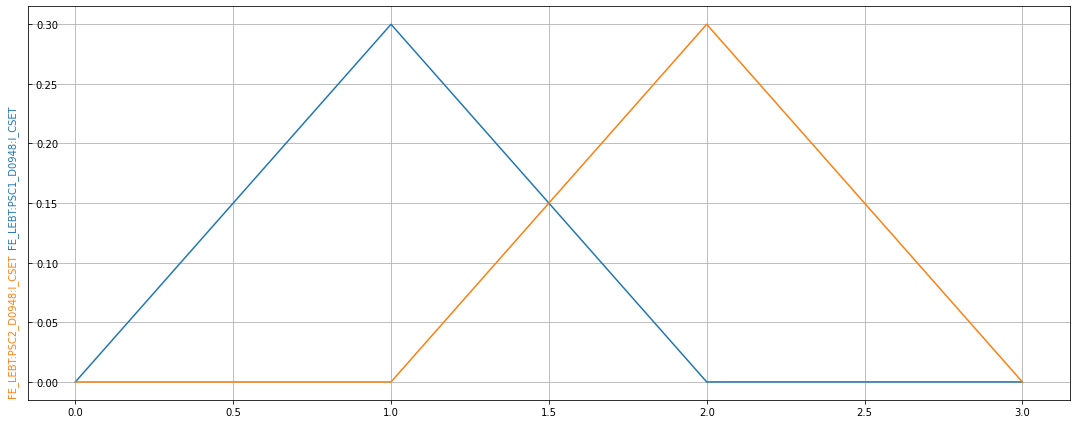

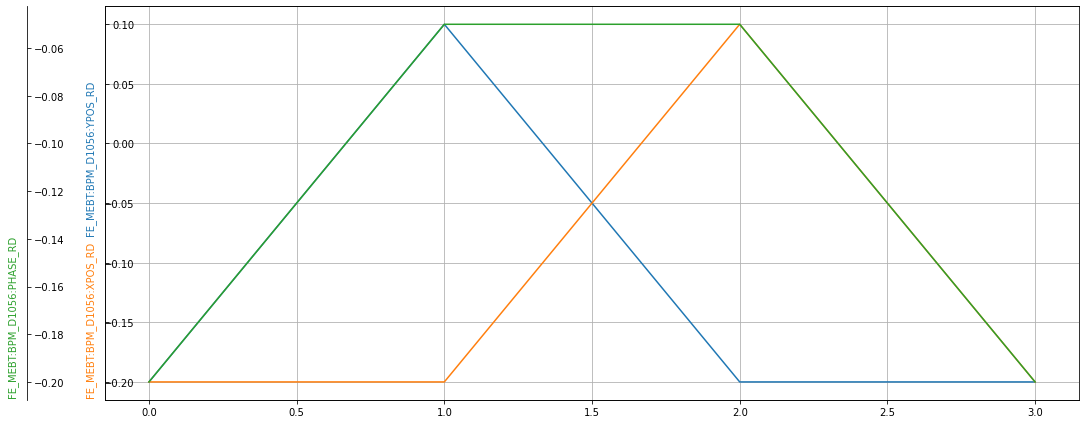

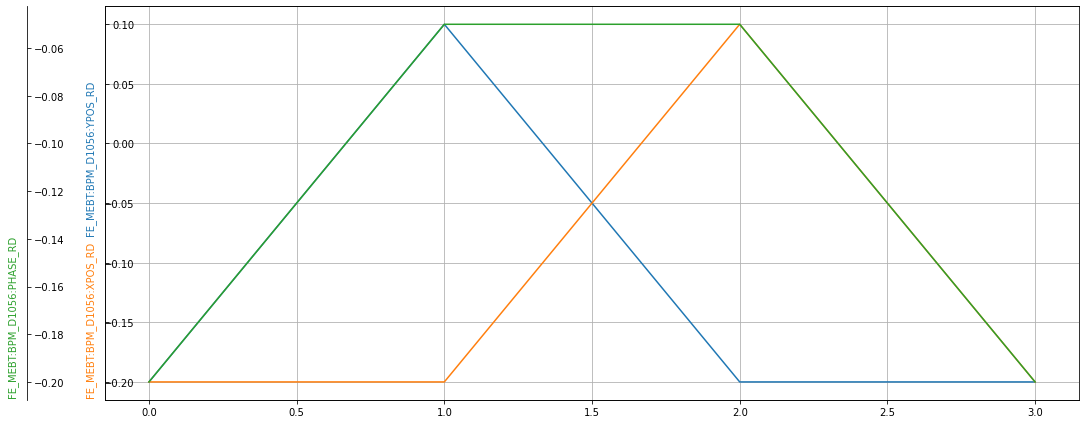

In [13]:
result = res.lsq_linear(jac_use3points=False,callbacks=callbacks)
for f in callbacks:
    f.close()

In [14]:
result.x

array([0., 0.])

In [15]:
res(result.x)

array([0., 0., 0., 0., 0., 0.])

In [16]:
res.history['objectives_var']["values"]

[array([0., 0., 0., 0., 0., 0.]),
 array([0.3 , 0.  , 0.15, 0.6 , 0.  , 0.3 ]),
 array([0.  , 0.3 , 0.15, 0.  , 0.6 , 0.3 ]),
 array([0., 0., 0., 0., 0., 0.]),
 array([0., 0., 0., 0., 0., 0.])]

In [17]:
res.history['objectives_var']['names']

['D10_FE_MEBT:BPM_D1056:XPOS_RD',
 'D10_FE_MEBT:BPM_D1056:YPOS_RD',
 'D10_FE_MEBT:BPM_D1056:PHASE_RD',
 'D20_FE_MEBT:BPM_D1056:XPOS_RD',
 'D20_FE_MEBT:BPM_D1056:YPOS_RD',
 'D20_FE_MEBT:BPM_D1056:PHASE_RD']

In [18]:
for n,v in zip(res.history['jacobian_var']['names'], res.history['jacobian_var']['values'][0]):
    print(n,v)

d (D10 FE_MEBT:BPM_D1056:XPOS_RD)/d FE_LEBT:PSC2_D0948:I_CSET 0.9999999999999997
d (D10 FE_MEBT:BPM_D1056:XPOS_RD)/d FE_LEBT:PSC1_D0948:I_CSET 0.0
d (D10 FE_MEBT:BPM_D1056:YPOS_RD)/d FE_LEBT:PSC2_D0948:I_CSET 0.0
d (D10 FE_MEBT:BPM_D1056:YPOS_RD)/d FE_LEBT:PSC1_D0948:I_CSET 0.9999999999999997
d (D10 FE_MEBT:BPM_D1056:PHASE_RD)/d FE_LEBT:PSC2_D0948:I_CSET 0.49999999999999994
d (D10 FE_MEBT:BPM_D1056:PHASE_RD)/d FE_LEBT:PSC1_D0948:I_CSET 0.49999999999999994
d (D20 FE_MEBT:BPM_D1056:XPOS_RD)/d FE_LEBT:PSC2_D0948:I_CSET 1.9999999999999993
d (D20 FE_MEBT:BPM_D1056:XPOS_RD)/d FE_LEBT:PSC1_D0948:I_CSET 0.0
d (D20 FE_MEBT:BPM_D1056:YPOS_RD)/d FE_LEBT:PSC2_D0948:I_CSET 0.0
d (D20 FE_MEBT:BPM_D1056:YPOS_RD)/d FE_LEBT:PSC1_D0948:I_CSET 1.9999999999999993
d (D20 FE_MEBT:BPM_D1056:PHASE_RD)/d FE_LEBT:PSC2_D0948:I_CSET 0.9999999999999997
d (D20 FE_MEBT:BPM_D1056:PHASE_RD)/d FE_LEBT:PSC1_D0948:I_CSET 0.9999999999999997


In [19]:
res.history['condition0']['jacobian']["values"]

[]

In [20]:
res.history['condition1']['jacobian']["values"]

[]

In [21]:
res.history['condition2']['jacobian']["values"]

[]